In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
df = pd.read_csv("cleaned_preprocessed_dataset.csv")
df.head()


,activitysiteid,activitydescription,bookingenddatetime_(month_/_day_/_year)_apr_may,bookingstarttime_apr_may,maxbookees_apr_may,number_booked_apr_may,price_(inr)_apr_may,bookingenddatetime_(month_/_day_/_year)_june,bookingstarttime_june,maxbookees_june,number_booked_june,price_(inr)_june
0,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-05,10:00:00,35.0,25.0,499.0
1,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-12,10:00:00,35.0,23.0,499.0
2,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-19,10:00:00,35.0,21.0,499.0
3,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-26,10:00:00,35.0,18.0,499.0
4,BRP,20:20:20 10-11 Am,2018-04-10,10:00:00,0.239673,0.891390,-1.731935,2018-06-05,10:00:00,35.0,25.0,499.0


In [3]:
# Convert date columns
df["bookingenddatetime_(month_/_day_/_year)_apr_may"] = pd.to_datetime(
    df["bookingenddatetime_(month_/_day_/_year)_apr_may"], errors="coerce"
)

df["bookingenddatetime_(month_/_day_/_year)_june"] = pd.to_datetime(
    df["bookingenddatetime_(month_/_day_/_year)_june"], errors="coerce"
)

# Unified booking date
df["booking_date"] = df[
    "bookingenddatetime_(month_/_day_/_year)_apr_may"
].combine_first(
    df["bookingenddatetime_(month_/_day_/_year)_june"]
)

# Unified demand column
df["number_booked"] = df["number_booked_apr_may"].combine_first(
    df["number_booked_june"]
)

df = df.dropna(subset=["booking_date", "number_booked"])

df.head()


,activitysiteid,activitydescription,bookingenddatetime_(month_/_day_/_year)_apr_may,bookingstarttime_apr_may,maxbookees_apr_may,number_booked_apr_may,price_(inr)_apr_may,bookingenddatetime_(month_/_day_/_year)_june,bookingstarttime_june,maxbookees_june,number_booked_june,price_(inr)_june,booking_date,number_booked
0,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-05,10:00:00,35.0,25.0,499.0,2018-04-03,1.528272
1,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-12,10:00:00,35.0,23.0,499.0,2018-04-03,1.528272
2,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-19,10:00:00,35.0,21.0,499.0,2018-04-03,1.528272
3,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-26,10:00:00,35.0,18.0,499.0,2018-04-03,1.528272
4,BRP,20:20:20 10-11 Am,2018-04-10,10:00:00,0.239673,0.891390,-1.731935,2018-06-05,10:00:00,35.0,25.0,499.0,2018-04-10,0.891390


In [4]:
ts = (
    df.groupby("booking_date")["number_booked"]
    .sum()
    .sort_index()
)

ts.head()


booking_date
2018-04-01    17.227031
2018-04-02   -10.294061
2018-04-03    90.857599
2018-04-04   -16.572846
2018-04-05   -32.313820
Name: number_booked, dtype: float64

In [5]:
train_size = int(len(ts) * 0.8)

train = ts.iloc[:train_size]
test = ts.iloc[train_size:]

train.shape, test.shape


((66,), (17,))

In [6]:
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

model_fit.summary()


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          number_booked   No. Observations:                   66
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -330.564
Date:                Thu, 18 Dec 2025   AIC                            667.128
Time:                        20:41:35   BIC                            673.651
Sample:                             0   HQIC                           669.702
                                 - 66                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0769      0.130      0.590      0.555      -0.179       0.333
ma.L1         -0.9962      0.548     -1.818      0.069      -2.070       0.078
sigma2      1442.2827    844.093      1.709      0.088    -212.110    3096.675
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.14
Prob(Q):                              0.92   Prob(JB):                         0.34
Heteroskedasticity (H):               0.71   Skew:                             0.35
Prob(H) (two-sided):                  0.43   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
forecast = model_fit.forecast(steps=len(test))
forecast.index = test.index

forecast.head()


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


booking_date
2018-06-09    3.076228
2018-06-10    2.235773
2018-06-12    2.171110
2018-06-13    2.166135
2018-06-14    2.165753
Name: predicted_mean, dtype: float64

In [8]:
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)

mae, mse


(27.423314610756876, 1062.818733218258)

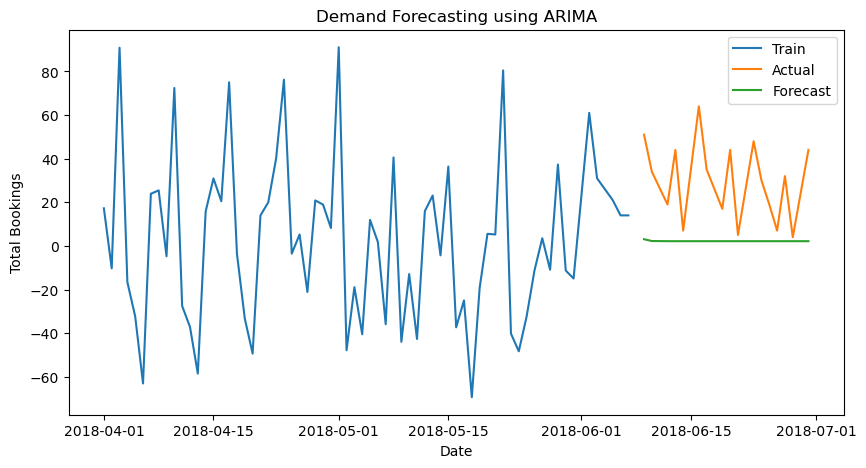

In [9]:
plt.figure(figsize=(10,5))
plt.plot(train, label="Train")
plt.plot(test, label="Actual")
plt.plot(forecast, label="Forecast")
plt.legend()
plt.title("Demand Forecasting using ARIMA")
plt.xlabel("Date")
plt.ylabel("Total Bookings")
plt.show()


In [11]:
forecast.head(), mae, mse


(booking_date
 2018-06-09    3.076228
 2018-06-10    2.235773
 2018-06-12    2.171110
 2018-06-13    2.166135
 2018-06-14    2.165753
 Name: predicted_mean, dtype: float64,
 27.423314610756876,
 1062.818733218258)